# Tutorial 3 -  Análisis en ventanas de tiempo
### Noel Isaías Placencia-Díaz, Erin C. McKiernan, Marco Arieli Herrera-Valdez,
### Facultad de Ciencias, UNAM




## Tabla de contenidos:

[1. Introducción](#introduction)

[2. Análisis en ventanas de tiempo](#timewindow)

[3. Obtener la varianza en ventanas de tiempo](#variance)

<a id='introduction'></a>
## 1. Introducción - Series de tiempo no estacionarias 

Una serie de tiempo es llamada estacionaria si su distribución de probabilidad no cambia con respecto al tiempo, esto quiere decir que su valor promedio y su varianza no cambian con respecto al tiempo, esto hace a los procesos estacionarios (o series de tiempo estacionarias), fáciles de predecir, un ejemplo de una serie de tiempo estacionaria en fisiología es el ritmo cardiaco en reposo de un corazón sano.

En el análisis de datos fisiológicos es común encontrar series de tiempo no estacionarias, un ejemplo de esto lo podemos ver en la serie de tiempo del EMG que analizamos en el tutorial 2, recordemos que este registro fue obtenido colocando electrodos en el brazo de un voluntario, a quien se le pidió que levantara un peso mientras se realizaron las mediciones dela actividad muscular.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import pandas as pd
import scipy as sc

In [3]:
record1 = wave.open('Dec0.wav', 'r') 
frames = record1.readframes(-1) 
waveData = np.fromstring(frames, 'Int16')

numChannels = record1.getnchannels() #número de canales
sampleRate = record1.getframerate()  #frecuencia de muestreo
sampleWidth = record1.getsampwidth()
numFrames = record1.getnframes() 

tiempo = np.arange(0,len(waveData))*(sampleRate)

/ext/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()


<a id='timewindow'></a>
### 2. Colocar los datos en ventanas de tiempo.
Una forma de estudiar computacionalmente procesos no estacionarios es dividir el registro original en intervalos de tiempo regulares y medir las propiedades estadísticas de los datos en cada uno de estos segmentos. A cada uno de estos subregistros se les llama $\textit{ventanas de tiempo}$.

A continuación implementaremos una función que divide un registro en ventanas de tiempo:

In [4]:
def single_chan_wind(x,npoints):   #los parámetros de esta función son el registro a analizar y el número de puntos en cada ventana de tiempo.
    
    single_chan_wind = []
    tot_points = len(x)            #Toma el número total de puntos de la serie
    L = npoints
    
    nwind = tot_points//npoints    #Define el número de ventanas como la parte entera del cociente entre el número total de puntos y el número de                                         puntos por ventana de tiempo
    
    for h in range(0,nwind):
        
        t = x[h*L:L*(1+h)]         #Separa en ventanas de tiempo
        single_chan_wind.append(t) #Coloca todas las ventanas de tiempo en un arreglo
        
    return(single_chan_wind)

Aplicamos la función anterior a los datos, eligiendo ventanas de tiempo que contengan 50000 datos cada una:

In [5]:
wind_waveData = single_chan_wind(waveData,50000)

In [6]:
#la función generó 55 ventanas, cada una con 50000 datos:
np.shape(wind_waveData)

# NOTA: Si queremos acceder, por ejemplo, a la primer ventana de tiempo tecleamos: wind_waveData[0]

(55, 50000)

In [7]:
50000/sampleRate # Cada ventana de tiempo equivale a 1.1338 s aproximadamente

1.1337868480725624

<a id='variance'></a>
### 3. Calcular la varianza en cada una de las ventanas de tiempo
La siguiente función regresa un arreglo con la varianza calculada en ventadas de tiempo que tienen un tamaño predefinido.

In [8]:
def variance_single_chan_wind(x,npoints):
    
    tot_points = len(x) #número total de puntos en el registro
    nwind = tot_points//npoints #hace un cociente para obtener el número de ventanas de tiempo
    wind_x = single_chan_wind(x,npoints) #Llama a la función que definimos anteriormente para reacomodar los datos en ventanas de tiempo
    
    v_single_chan_wind = [np.var(wind_x[w]) for w in range(0,nwind)] #Obtiene la varianza de cada una de las ventanas de tiempo anteriores.
   
    return(v_single_chan_wind)

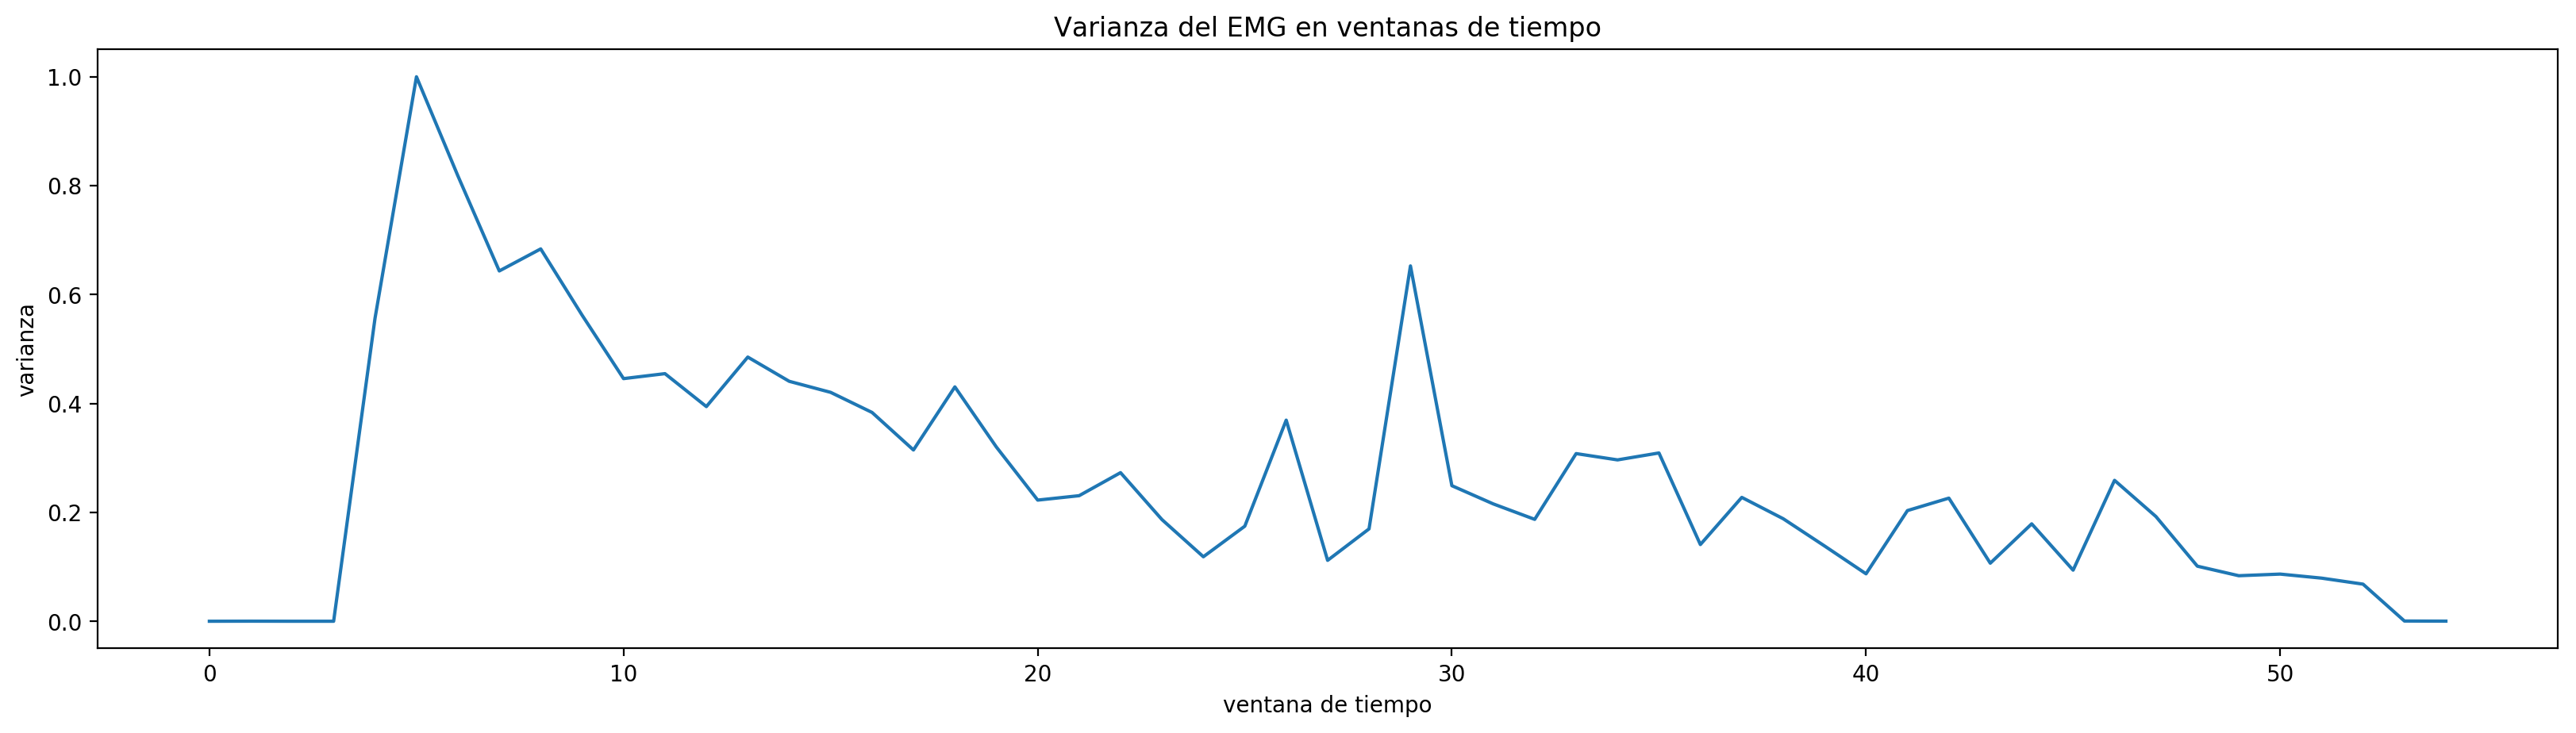

In [9]:
fig = plt.figure(figsize=(20, 5), dpi=100)
plt.figure(1)

plt.title('Varianza del EMG en ventanas de tiempo')
plt.xlabel(r'ventana de tiempo')
plt.ylabel(r'varianza')

plt.plot(variance_single_chan_wind(waveData,50000)/max(variance_single_chan_wind(waveData,50000)))

plt.show()

Podemos ver que la varianza de los datos tiende a disminuir  con el tiempo durante el registro, ¿puedes explicar qué relación tiene esto con la actividad muscular que realizaba el voluntario?.